# Introduction to Machine Learning - Linear Regression

### Import packages

In [4]:
# Import all necessary packages/libraries
import numpy as np              # numerical python for math operations
import matplotlib.pyplot as plt # for visualializations

### Generate sample data and plot

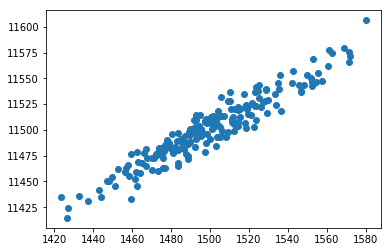

In [5]:
# Generate sample data with some noise and plot it
sample_x = np.random.normal(1500,30,200)
noise = np.random.normal(0,10,(200,))
sample_y = 1*sample_x + 10000 + noise
plt.scatter(sample_x, sample_y)
plt.show()

### Cost Function

In [6]:
def cost(m,b):
    total_error = sum((sample_y[i] - (m*sample_x[i]+b))**2 for i in range(len(sample_x)))
    return total_error/len(sample_x)

### Gradient Descent(No optimization)

In [54]:
# Single Gradient Descent step
def gradient_descent_step(m_current, b_current, learning_rate):    
    l =  len(sample_x)    
    m_gradient = sum(sample_x[i] * (sample_y[i]-(m_current*sample_x[i]+b_current)) for i in range(l))*(-2/l)
    b_gradient = sum((sample_y[i]-(m_current*sample_x[i]+b_current)) for i in range(l))*(-2/l)    
    return m_current - learning_rate*m_gradient, b_current - learning_rate*b_gradient

### Linear Regression

In [61]:
# run gradient descent several times to reach global minima
def linear_regression_runner():
    m, b = 0, 0 # start with some random line at the end of this method, we should get a best fit
    num_gradient_steps = 100
    learning_rate = 0.05
    while num_gradient_steps > 0:
        num_gradient_steps -= 1
        m, b = gradient_descent_step(m,b,learning_rate)        
    print(m,b)
    print(cost(m,b))        

In [64]:
linear_regression_runner()

nan nan
nan
